앙살블(Ensemble)이란, 주어진 데이터로 여러 개의 예측 모델을 만들어 조합하여, 하나의 최종 예측 모델을 만드는 방법으로, 여러 개의 분류 모형에 의한 결과를 종합하여 정확도를 높인다. 앙상블은 각각의 모델이 가진 장점은 취하면서 단점은 보완하기 때문에 최적의 단일 모델을 뛰어 넘는 성능을 보인다.

# Bagging
배깅(Bagging)은 Bootstrap Aggregating의 줄임 말로, 주어진 데이터에서 복원 랜덤 샘플링(Bootstrap)을 통해 다양한 Train set을 구성, 각 Train set에 대한 예측 모델을 생성하고 예측한 결과를 집계(Aggregating)하여 최종 예측 결과를 산출하는 방법이다.

Bagging은 예측 모형의 Variance가 큰 경우, Variance를 줄이기 위해 사용된다. 따라서 Bagging은 일반적으로 Overfitting된 모형, Bias가 작고 Variance가 큰 모형에 대해 사용하는 것이 적합하다.

![Bagging](https://www.dropbox.com/s/h0xob2027whpcn3/Bagging.jpg?raw=1)


배깅의 알고리즘은 위의 그림과 같다. 원 데이터로부터 n번의 복원 랜덤 샘플링을 하고 각 샘플을 가지고 모델링을 하고 예측을 한 값을 결합하여 최종 모형을 생성한다.

## 집계 방법

Bagging에서 각 모델들의 예측 결과는 집계하는 방법은 다음과 같다.
* 반응변수가 Categorical인 경우 : 다수결 투표(Voting)
* 반응변수가 Continuous인 경우 : 예측값들의 평균(Average)

## Out-of-Bag(OOB) 오차 추정
Out-of-Bag 샘플은 Bootstrap을 통한 임의 중복 추출 시 Train set에 추출되지 않은 데이터들을 말하며, OOB 샘플들을 가지고 Random Forest의 성능을 측정한다. Breiman의 배깅된 분류기들의 오차 측정에 대한 연구에서 OOB 예측 방법이 test set을 구성하여 검증을 하는 것만큼 정확하다는 것을 입증하면서, OOB 오차 추정을 통해 따로 test set을 구성할 필요가 없어졌다.  
데이터가 충분히 큰 경우, 각 데이터가 Bootstrap을 통한 train set에서 제외될 확률은 약 36.78%이다.  
$$\lim_{n \to \infty}\left(1-\frac{1}{n}\right)^n = e^{-1} = 0.3678$$
아래는 1에서 100까지의 100개 데이터를 복원 추출할 때 50이 한 번도 안 들어간 확률을 계산한 것이다.

In [89]:
a <- rep(NA, 50000)
for (i in 1:50000) {
    a[i] <- sum(sample(1:100, rep = T) == 50) > 0
}
1-mean(a)

[1] 0.36664

## Bagging 예시

In [22]:
# Load library
library(caret)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ISLR)
library(ipred)
library(randomForest)
options(repr.plot.width=7, repr.plot.height=3)

# Load data
data(Default)

# Split data
set.seed(1990)
train_idx <- createDataPartition(y = Default$default, p = 0.7, list = F)
train <- Default[train_idx,]
test <- Default[-train_idx,]

In [31]:
bag.fit <- ipred::bagging(default ~ ., data = train, nbagg = 10, coob = T)

<code>ipred</code> 패키지의 <code>bagging</code>함수에는 2개의 파라미터가 있다.
* nbagg : Bootstrap 수
* coob : Out-of-Bag 오차 추정 여부

<code>coob</code> 파라미터를 <code>True</code>로 했을 경우 OOB 오차를 확인할 수 있다.

In [33]:
bag.fit$err

[1] 0.04485074

In [34]:
bag.pred <- predict(bag.fit, newdata = test)

In [37]:
confusionMatrix(bag.pred, test$default, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  2866   66
       Yes   34   33
                                          
               Accuracy : 0.9667          
                 95% CI : (0.9596, 0.9728)
    No Information Rate : 0.967           
    P-Value [Acc > NIR] : 0.567032        
                                          
                  Kappa : 0.3811          
 Mcnemar's Test P-Value : 0.001935        
                                          
            Sensitivity : 0.33333         
            Specificity : 0.98828         
         Pos Pred Value : 0.49254         
         Neg Pred Value : 0.97749         
              Precision : 0.49254         
                 Recall : 0.33333         
                     F1 : 0.39759         
             Prevalence : 0.03301         
         Detection Rate : 0.01100         
   Detection Prevalence : 0.02234         
      Balanced Accuracy : 0.66080         
                        

Random Forest는 이와같은 문제를 해결할 수 있다. Random Forest는 기본적으로 Bagging과 유사하나, Bootstrap으로 생성된 데이터들을 가지고 각각 모델을 만들 때 모든 변수를 사용하는 것이 아니라 임의로 변수들을 선택하여 모델을 생성하는게 차이점이다. 이 때 변수의 수는 일반적으로 Classification의 경우 $\sqrt{\text{총 변수의 수}}$개, Regression의 경우 $\frac{총 변수의 수}{3}$개를 선택한다. 변수 선택에 임의성을 더해서 앙상블이 갖는 장점을 극대화하고 예측 및 분류 정확도를 기존의 방법보다 개선하며 안정성을 얻는다. 

![RandomForest](https://www.dropbox.com/s/9tsgpe5136arg3w/randomforest.jpg?raw=1)

## RamdomForest 예시

In [107]:
rf.fit <- randomForest(default ~ ., data = train, ntree = 500, mtry = sqrt(dim(train)[2]))

<code>randomForest</code> 패키지의 <code>randomForest</code>함수에는 2개의 파라미터가 있다.
* ntree : 생성할 트리의 수
* mtry : 선택할 변수의 수

<code>randomForest</code> 함수는 자동적으로 OOB 오차를 계산해준다.

In [108]:
rf.fit


Call:
 randomForest(formula = default ~ ., data = train, ntree = 500,      mtry = sqrt(dim(train)[2])) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.13%
Confusion matrix:
      No Yes class.error
No  6703  64 0.009457662
Yes  155  79 0.662393162

In [109]:
rf.pred <- predict(rf.fit, newdata = test)

In [242]:
confusionMatrix(rf.pred, test$default, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  2870   67
       Yes   30   32
                                          
               Accuracy : 0.9677          
                 95% CI : (0.9607, 0.9737)
    No Information Rate : 0.967           
    P-Value [Acc > NIR] : 0.4452345       
                                          
                  Kappa : 0.3818          
 Mcnemar's Test P-Value : 0.0002569       
                                          
            Sensitivity : 0.32323         
            Specificity : 0.98966         
         Pos Pred Value : 0.51613         
         Neg Pred Value : 0.97719         
              Precision : 0.51613         
                 Recall : 0.32323         
                     F1 : 0.39752         
             Prevalence : 0.03301         
         Detection Rate : 0.01067         
   Detection Prevalence : 0.02067         
      Balanced Accuracy : 0.65644         
                        

아래의 그래프는 트리 수에 따른 종속 변수의 범주별 오분류율을 나타낸다(검은색은 전체 오분류율)

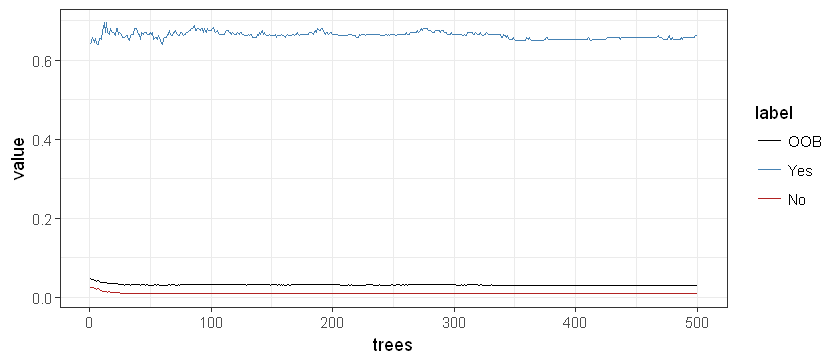

In [243]:
data.frame(rf.fit$err.rate) %>% mutate(trees = 1:500) %>%
  gather(key = "label", value = "value", -trees) %>%
  ggplot(aes(trees, value, col = label, group = label)) + geom_line() +
  scale_color_manual(name = "label",
                     values = c("Black", "steelblue", "firebrick"), 
                     limits = c("OOB", "Yes", "No")) + theme_bw()

## 변수 중요도
Random Forest는 각 트리에서 변수로부터 분할이 일어날 때 불순도(Impurity)의 감소가 얼마나 일어나는지를 계산하여 해당 변수의 중요도를 계산할 수 있다. 회귀의 경우에는 잔차제곱합(Residual Sum of Square, RSS)를 통해 측정된다.

In [244]:
importance(rf.fit)

,MeanDecreaseGini
student,4.85065
balance,301.95820
income,147.42158


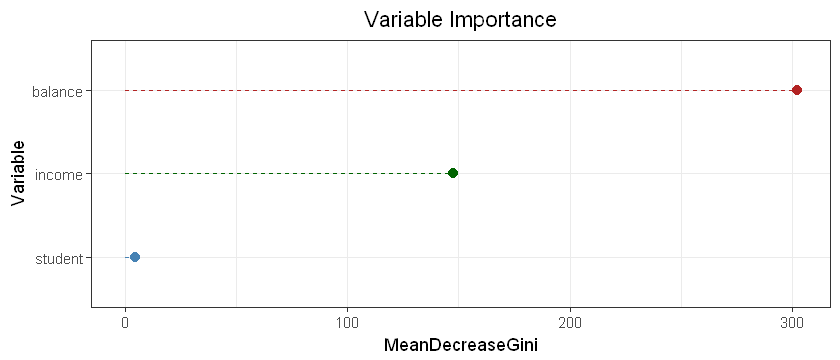

In [245]:
data.frame(importance(rf.fit), Variable = rownames(importance(rf.fit))) %>%
  arrange(MeanDecreaseGini) %>%
  mutate(Variable = factor(Variable, Variable)) %>%
  ggplot(aes(Variable, MeanDecreaseGini, col = Variable)) +
  geom_segment(aes(x = Variable, xend = Variable, y = 0, yend = MeanDecreaseGini), linetype = "dashed") +
  geom_point(size = 2.5) + 
  scale_color_manual(name = "",
                     values = c("steelblue", "darkgreen", "firebrick")) +
  coord_flip() + labs(title = "Variable Importance") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

# Boosting
Boosting이란, 예측력이 약한 모형들을 결합하여 강한 예측 모형을 만드는 것으로, 잘못 분류된 데이터에 가중치를 주어 더 잘 분류하는 것이 목적이다. Boosting 또한 Bagging과 같이 복원 랜덤 샘플링(Bootstrap)을 하지만, 가중치를 부여하는 점이 차이이다. 또한 Bagging은 Bootstrap한 Train set들을 병렬로 학습시키지만, Boosting은 Train set들을 순차적으로 학습시키고 학습이 끝나면 나온 결과에 따라 가중치가 재분배된다. 오답에 대해 높은 가중치를 부여하고, 정답에 대해 낮은 가중치를 부여하기 때문에 오답에 더욱 집중할 수 있어서 정확도가 높게 나타나지만, Outlier에 취약하다는 단점이 있다.

Boosting은 AdaBoost, XGBoost, GradientBoost 등 다양한 모델이 있는데, 이 중 XGBoost는 매우 강력한 성능을 보인다.